<a href="https://colab.research.google.com/github/AACRobinson/IMLO-Assessment/blob/main/PyTorch_Demonstration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#This is my notes on the example that was used in the week 9 lecture.
#This Google Collab file is linked with my GitHub. It is unrelated to the project but is useful
#to refer back to to get some frame of reference when developing my project.

# **Preprocessing the Iris Dataset**

In [2]:
import pandas as pd
from sklearn import datasets

#Load the iris dataset from sklearn (we'll use a similar one in the assessment)
#Contains basic information about a bunch of flowers
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head())
print(df.tail())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8


In [3]:
#Target is the our data labels, i.e. training data - we set it to float data type of later learning algorithms
#The values 0-2 indicate the three types of flower in the dataset
df["target"] = iris.target
df["target"] = df["target"].astype(float)
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0       0.0  

In [4]:
#Now we are going to preprocess the data
x = df.drop("target", axis=1).values  #Dataset
y = df["target"].values   #Labels
print(x)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

# **Neural Networks**

In [5]:
#Time to start building the neural network - import PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F   #This contains useful stuff like the loss and activation functions

In [6]:
class My_NN(nn.Module): #PyTorch neural network module - defines the class as a neural network
  def __init__(self, in_feature, hidden_layers, out_features, activation_function = F.relu): #in_features - number of input features (in this case 4, sepal and petal width/length)
                                                                                              #hidden_layers - list of integers, indicates the number of neurones on each layer
                                                                                              #out_features - number of output features (in this case 1, a float of value 0-2)
                                                                                              #activation_function - we're using relu to train the model (over sigmoid/step)
    super().__init__()
    if len(hidden_layers) < 1:
      raise Exception("A My_NN must have at least 1 hidden layer")  #(Because it does)
    #Now let's add neurones by layer
    self.layers = []
    self.layers.append(nn.Linear(in_feature, hidden_layers[0]))  #Takes a number of input features defined earlier, produces a number of outputs (equal to whatever is in the first element of hidden_layers)
    self.add_module("input_layer", self.layers[0]) #We name this first layer as the input layer
    for i in range(1, len(hidden_layers)-1) :
      self.layers.append(nn.Linear(hidden_layers[i-1], hidden_layers[i])) #Repeat for all layers - #input features = number of output features of last layer
      self.add_module("hidden_layer_" + str(self.layers[i]), self.layers[1]) #All intermediary layers are named hidden layers
    self.layers.append(nn.Linear(hidden_layers[-1], out_features))  #Add the last layer - produces a number of output equal to whatever was defined earlier
    self.add_module("output_layer", self.layers[-1]) #The last layer is named the output layer

    #We can get the output layer instead of the entire neural network
    self.out = nn.Linear(hidden_layers[-1], out_features)
    self.activation_function = activation_function

  def forward(self, x): #Feed Forward Network - Forwards the output values to the next layer
    for i in range(len(self.layers)):
      x = self.activation_function(self.layers[i](x)) #!! Supplied by PyTorch (relu)
    x = self.out(x)
    return x


In [7]:
classifier = My_NN(in_feature=4, hidden_layers=[16, 8], out_features=3, activation_function=F.relu)   #Can now define a classifier algorithm
                                                                                                          #For good memory management, layers should be to a power of 2
                                                                                                          #!! Output will be one hot encoded - so 000, 001 or 010 - need 3 output features


# **NN Training and Evaluation**

In [8]:
from sklearn.model_selection import train_test_split  #Useful function that splits the dataset into two sets, one is used for training and the other for testing

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)  #Splits the dataset 80/20
print("x:", x, "\n x_train:", x_train)
print("y:", y, "\n y_train:", y_train)

x: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1

In [10]:
x_train = torch.FloatTensor(x_train)  #Need this tensor function to properly preprocess the data
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

print(x_test)

tensor([[5.6000, 2.7000, 4.2000, 1.3000],
        [5.8000, 2.7000, 4.1000, 1.0000],
        [7.4000, 2.8000, 6.1000, 1.9000],
        [4.9000, 3.6000, 1.4000, 0.1000],
        [5.7000, 2.6000, 3.5000, 1.0000],
        [6.1000, 3.0000, 4.6000, 1.4000],
        [4.9000, 2.5000, 4.5000, 1.7000],
        [6.9000, 3.1000, 5.4000, 2.1000],
        [7.0000, 3.2000, 4.7000, 1.4000],
        [6.5000, 3.0000, 5.8000, 2.2000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [5.4000, 3.0000, 4.5000, 1.5000],
        [4.7000, 3.2000, 1.6000, 0.2000],
        [6.0000, 2.7000, 5.1000, 1.6000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [5.0000, 3.4000, 1.6000, 0.4000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [7.7000, 2.6000, 6.9000, 2.3000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [4.9000, 3.1000, 1.5000, 0.2000],
        [6.7000, 3.1000, 5.6000, 2.4000],
        [5.8000, 2.6000, 4.0000, 1.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [5.1000, 3.5000, 1.4000, 0

In [11]:
lossFn = nn.CrossEntropyLoss()  #Now need to define a loss function
optimiser = torch.optim.Adam(classifier.parameters(), lr=0.0001)  #Supplied optimisation algorithm - takes previous classifier parameters as well as step size
epochs = 500  #Number of iterations through the dataset

# **Actually Training the Data**

In [12]:
losses = [] #Going to store the loss of each iteration through the classifier - should decrease as algorithm iterates
for i in range(epochs):
  y_pred = classifier.forward(x_train)  #The feed forward function from earlier
  loss = lossFn(y_pred, y_train)
  losses.append(loss.detach().numpy())  #We can then plot these found losses later
  if i % 10 == 0:
    print("Epoch " + str(i) + ":", loss)  #Prints the loss at every 10th interval

  #Now make corrections to the data
  optimizer.zero_grad() #Calculates df, the differential and solves it
  loss.backwards()  #Iterates backwards through the NN
  optimizer.step()  #(One step backwards)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (120x16 and 8x3)

# **Evaluate the Data**

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

ValueError: x and y must have same first dimension, but have shapes (500,) and (0,)

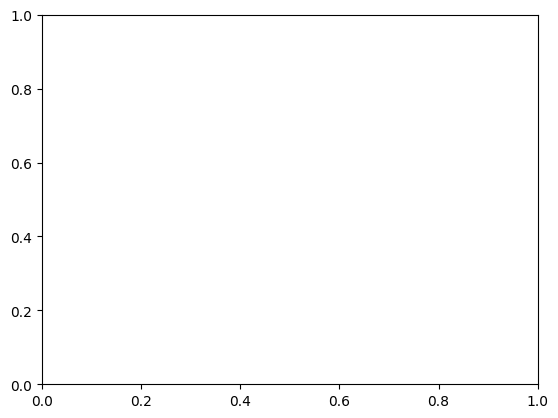

In [14]:
plt.plot(range(epochs), losses) #Plot a graph
plt.plot([500], [loss], "gx") #Test the model with a point of data - lr is probably too high/epochs is probably too low
plt.ylabel("Loss")
plt.xlabel("Epoch")

In [15]:
with torch.no_grad(): #Do not calculate the gradient
  y_eval = classifier.forward(x_test)
  loss = lossFn(y_eval, y_test)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (30x16 and 8x3)